In [234]:
from xspec import *

from astropy.table import Table
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

In [2]:
cd HD_200560B/0671930101/pps/

/home/nkhan/EXOD2/notebooks/HD_200560B/0671930101/pps


/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
f = "P0671930101PNS003SRSPEC0001.FTZ"
r = "epn_e3_ff20_sdY8.rmf"
s = Spectrum(f, respFile=r)
Plot.xAxis = 'keV'
s.ignore("0.0-0.5")
s.ignore("10.0-**")


1 spectrum  in use
 
Spectral Data File: P0671930101PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.822e-01 +/- 2.390e-03 (86.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-168
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.06e+05 sec
 Using fit statistic: chi
 Using Background File                P0671930101PNS003BGSPEC0001.FTZ
  Background Exposure Time: 1.06e+05 sec
 Using Response (RMF) File            epn_e3_ff20_sdY8.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0671930101PNS003SRCARF0001.FTZ

Response successfully loaded.
Spectrum 1  Spectral Data File: P0671930101PNS003SRSPEC0001.FTZ
Net count rate (cts/s) for Spectrum:1  4.822e-01 +/- 2.390e-03 (86.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-168
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.06e+05 sec
 Using fit statistic: chi
 Using Background File                P0671930101PNS003B


Model TBabs<1>*diskbb<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   diskbb     Tin        keV      1.00000      +/-  0.0          
   3    2   diskbb     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared                37804.83     using 147 bins.

Test statistic : Chi-Squared                37804.83     using 147 bins.
 Null hypothesis probability of 0.00e+00 with 144 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH         2:Tin        3:norm
32214.7      967.644      -3     0.0343786       2.11888       2.97138
26900.1      9566.65      -4    0.00874156       1.59568       3.18555
25709        5179.66       0    0.00373020       1.59594       3.70904
25185

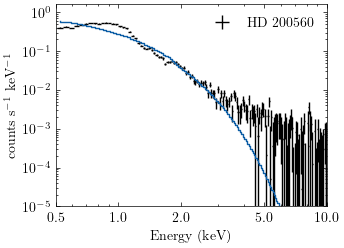

In [22]:
# Get Spectrum Data
Plot("data")
x = Plot.x()
y = Plot.y()
x_err = Plot.xErr()
y_err = Plot.yErr()

# Get Model Data
m = Model('TBabs*diskbb')
Fit.perform()
y_model = Plot.model()

# Get Model Data
m1 = Model('pow')
Fit.perform()
y_model1 = Plot.model()

plt.figure()
plt.errorbar(x, y, xerr=x_err, yerr=y_err, ls='none', color='black', lw=1.0, label='HD 200560')
plt.step(x, y_model)
plt.step(x, y_model1)

plt.xlabel('Energy (keV)')
plt.ylabel(r'counts s$^{-1}$ keV$^{-1}$')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-5)
plt.xlim(0.5, 10.0)
plt.xticks([0.5,1.0,2.0,5.0, 10.0], labels=[0.5,1.0,2.0,5.0, 10.0])
plt.legend()
plt.show()

In [266]:
from astropy.io import fits

In [285]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



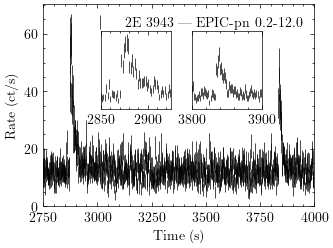

In [330]:
#import matplotlib.pyplot as plt
#from astropy.table import Table
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Read the data
tab_lc = Table.read('./2E_3943/0511001101/pps/P0511001101PNX000SRCTSR8001.FTZ')

# Create the main plot
fig, ax = plt.subplots() # figsize=(10, 6)
t0 = tab_lc['TIME'] - tab_lc['TIME'].min()
ax.errorbar(t0, tab_lc['RATE'],  yerr=tab_lc['ERROR'], ls='none', color='black', lw=0.5, label='2E 3943 | EPIC-pn 0.2-12.0')
#ax.plot(t0, tab_lc['BACK1V'], color='red', lw=0.5)
ax.set_xlim(2750, 4000)
ax.set_ylim(0)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Rate (ct/s)')
ax.legend()

# First inset
ax_inset1 = inset_axes(ax, width="20%", height="30%", loc="center", bbox_to_anchor=(-0.11, 0.13, 1, 1), bbox_transform=fig.transFigure)
ax_inset1.errorbar(t0, tab_lc['RATE'], yerr=tab_lc['ERROR'], ls='none', color='black', lw=0.5)
ax_inset1.set_xlim(2850, 2925)
ax_inset1.set_ylim(bottom=0)
ax_inset1.set_yticks([])

# Second inset
ax_inset2 = inset_axes(ax, width="20%", height="30%", loc="center", bbox_to_anchor=(0.15, 0.13, 1, 1), bbox_transform=fig.transFigure)
ax_inset2.errorbar(t0, tab_lc['RATE'], yerr=tab_lc['ERROR'], ls='none', color='black', lw=0.5)
ax_inset2.set_xlim(3800, 3900)
ax_inset2.set_ylim(bottom=0)
ax_inset2.set_yticks([])
plt.savefig('../data/plots/double_burst_e2_3943.png')
plt.savefig('../data/plots/double_burst_e2_3943.pdf')
plt.show()


/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/numpy/ma/core.py:1044: RuntimeWarning: invalid value encountered in cast
  np.copyto(result, da, casting='unsafe', where=m)


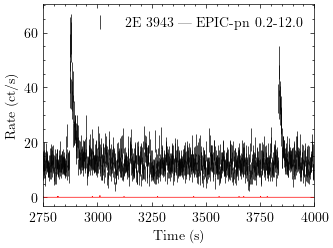

In [283]:
tab_lc = Table.read('./2E_3943/0511001101/pps/P0511001101PNX000SRCTSR8001.FTZ')
plt.figure()
t0 = tab_lc['TIME'] - tab_lc['TIME'].min()
plt.errorbar(t0, tab_lc['RATE'],  yerr=tab_lc['ERROR'], ls='none', color='black', lw=0.5, label='2E 3943 | EPIC-pn 0.2-12.0')
plt.plot(t0, tab_lc['BACK1V'], color='red', lw=0.5)
#plt.ylim(0)
plt.xlim(2750, 4000)
#plt.xlim(2850, 2925)
#plt.xlim(3820, 3900)
plt.xlabel('Time (s)')
plt.ylabel('Rate (ct/s)')
plt.legend()
#plt.savefig('/home/nkhan/EXOD2/data/plots/HD_200560_lc_10s.pdf')
#plt.savefig('/home/nkhan/EXOD2/data/plots/HD_200560_lc_10s.png')

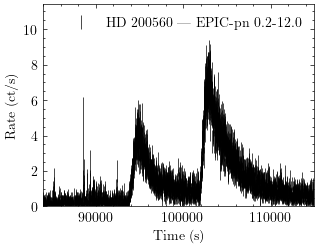

In [60]:
tab_lc = Table.read('./lc_bin_10s.ftz')
plt.figure()
plt.errorbar(tab_lc['TIME'], tab_lc['RATE1'],  yerr=tab_lc['ERROR1'], ls='none', color='black', lw=0.5, label='HD 200560 | EPIC-pn 0.2-12.0')
plt.ylim(0)
plt.xlim(84000, 115000)
plt.xlabel('Time (s)')
plt.ylabel('Rate (ct/s)')
plt.legend()
plt.savefig('/home/nkhan/EXOD2/data/plots/HD_200560_lc_10s.pdf')
plt.savefig('/home/nkhan/EXOD2/data/plots/HD_200560_lc_10s.png')

In [61]:
tab_lc

TIME,XAX_E,RATE1,ERROR1,FRACEXP
s,,ct / s,ct / s,
float64,float64,float32,float32,float32
0.0,5.0,0.13093755,0.30730623,1.0220001
10.0,5.0,0.46091405,0.32778057,1.0220001
20.0,5.0,0.54521,0.3204014,1.0220001
30.0,5.0,0.12125345,0.27368617,0.87600005
40.0,5.0,0.25160432,0.20458838,1.0220001
50.0,5.0,0.54223436,0.3217626,1.0220001
60.0,5.0,0.53462905,0.31723988,1.0220001
70.0,5.0,0.2713952,0.30640864,1.0220001
